# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_data_new = PolynomialFeatures(degree=3).fit_transform(x_data.reshape(-1, 1))
print(x_data.shape, x_data_new.shape)
linear_regressor = LinearRegression()
linear_regressor.fit(x_data_new, f_data)
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

(10,) (10, 4)
[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.952650937063254


### make_pipeline

In [30]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Ridge` (L2-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большие значения весов, они убывают плавно и примерно одновременно друг с другом.


In [31]:
np.logspace(-3, 2, 50)

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

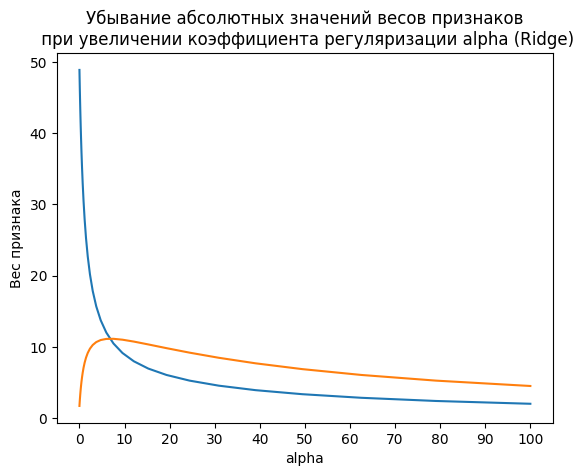

In [32]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]

mse_train = []
mse_test = []


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()
    
    coef = coeffs[i]
    y_pred_tr = np.dot(train_X, coef)
    mse_train.append(np.mean((y_pred_tr - train_y)**2))
    y_pred_ts = np.dot(test_X, coef)
    mse_test.append(np.mean((y_pred_ts - test_y)**2))


for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

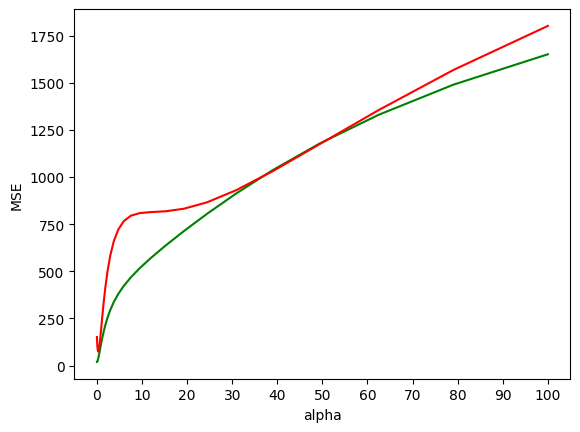

In [33]:
plt.plot(alpha_list, mse_train, color='g')
plt.plot(alpha_list, mse_test, color='r')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('MSE');

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Стандартизация

3.0


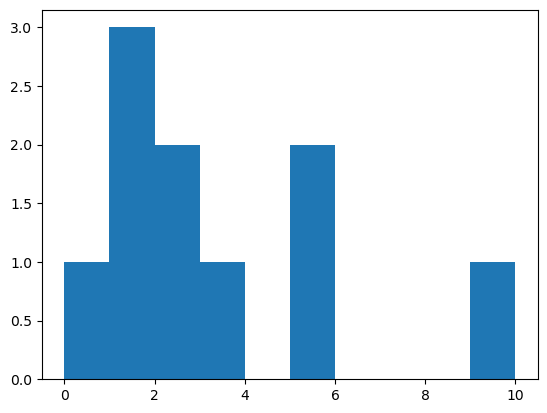

In [9]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


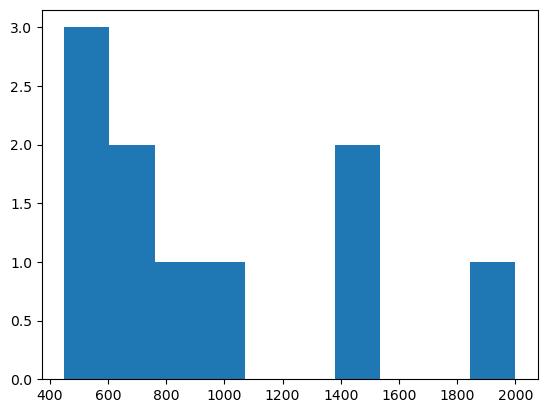

In [10]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [11]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [65]:
X_st_after_norm = X_norm.copy()
X_st_after_norm[:, 1] = standard_scale(X_st_after_norm[:, 1])
X_st_after_norm[:, 2] = standard_scale(X_st_after_norm[:, 2])
X_st_after_norm[:, 3] = standard_scale(X_st_after_norm[:, 3])

In [66]:
X_st_after_norm

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

In [12]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


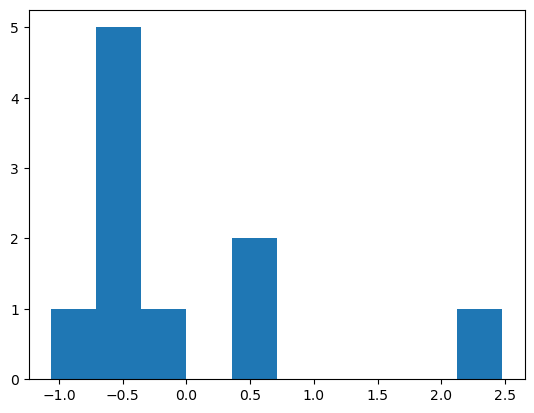

In [13]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


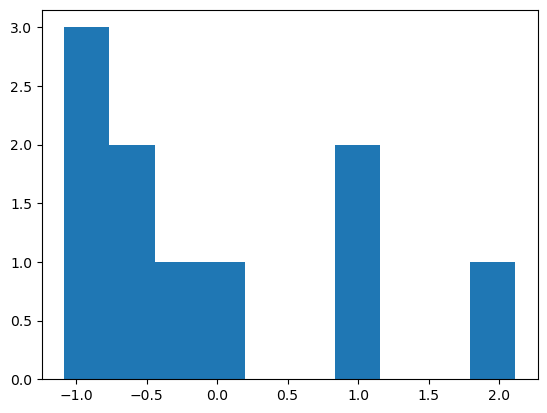

In [14]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [15]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [16]:
W = np.random.randn(X.shape[1])
W

array([ 0.029577  , -0.24894533,  0.80878771, -0.36155648])

In [17]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [18]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 0.99272197 -0.25069327  1.0750621  -0.45161348], error 3375.25090607019
Iter: 500, weights: [56.49772287  5.84406995  1.46355665  5.14747398], error 25.475819078726808
Iter: 1000, weights: [56.49999991  6.16496714  0.29017403  6.04180736], error 24.9781826685002
Iter: 1500, weights: [56.5         6.25476248 -0.12409949  6.37995096], error 24.914148499842614
Iter: 2000, weights: [56.5         6.28576809 -0.27280054  6.50249365], error 24.90585351209395
Iter: 2500, weights: [56.5         6.29686099 -0.32630308  6.54664437], error 24.904778833676065
Iter: 3000, weights: [56.5         6.30085034 -0.34555979  6.56253822], error 24.90463960057564
Iter: 3500, weights: [56.5         6.3022861  -0.35249102  6.56825919], error 24.904621561823756
Iter: 4000, weights: [56.5         6.30280288 -0.35498586  6.57031841], error 24.90461922476045
Iter: 4500, weights: [56.5         6.30298889 -0.35588386  6.57105961], error 24.904618921975377
Final MSE: 24.904618882747172


array([56.5       ,  6.30305576, -0.35620671,  6.57132609])

In [19]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        inds = np.random.randint(n, size=size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]


        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [20]:
stohastic_gradient_descent(X_st, y, iterations=5000, size=4, eta=1e-2)

Iter: 0, weights: [ 0.89023391 -0.30091579 -0.9038075   0.9446959 ], error 3257.9090975439303
Iter: 500, weights: [56.48902017  5.78025511  0.79099652  5.72286698], error 25.18159521483717
Iter: 1000, weights: [ 5.64422117e+01  6.01440212e+00 -2.26181794e-02  6.08336759e+00], error 25.10365296527301
Iter: 1500, weights: [56.74450135  6.33081855 -0.53706564  6.5333185 ], error 25.002171280648952
Iter: 2000, weights: [56.40231105  6.59596997 -0.52502004  6.83091347], error 25.050351469767598
Iter: 2500, weights: [56.76986325  6.36645285 -0.33939614  6.41700194], error 24.988442083864523
Iter: 3000, weights: [56.76644722  5.91718553 -0.23862559  6.11782732], error 25.43134019986747
Iter: 3500, weights: [56.6856779   6.262034   -0.42462483  6.5858743 ], error 24.947429166912233
Iter: 4000, weights: [56.64224844  6.5169253  -0.5038244   6.64492757], error 24.95173813020234
Iter: 4500, weights: [56.4378313   6.31675049 -0.41066449  6.64068497], error 24.90991811869968
Final MSE: 25.230641497

array([56.14723403,  6.63729697,  0.23802888,  5.94386499])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [50]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % 1000 == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [51]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [12.72682193  1.32024377  0.51732149  3.17816204], error 3223.362374717573
Iter: 1000, weights: [56.34128299  6.29862161 -0.34409056  6.56160277], error 24.929840018770697
Iter: 2000, weights: [56.34128299  6.29862161 -0.34409056  6.56160278], error 24.92984001875803
Iter: 3000, weights: [56.34128299  6.29862161 -0.34409056  6.56160278], error 24.92984001875803
Iter: 4000, weights: [56.34128299  6.29862161 -0.34409056  6.56160278], error 24.92984001875803
Final MSE: 24.92984001875803


array([56.34128299,  6.29862161, -0.34409056,  6.56160278])

In [52]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [9.10407168 2.85980623 2.49907633 2.78441823], error 3604.3140636255253
Iter: 500, weights: [56.5         6.3030668  -0.35625999  6.57137007], error 24.904618879953812
Iter: 1000, weights: [56.5         6.30309349 -0.35638884  6.57147642], error 24.90461887690839
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Final MSE: 24.90461887690838


array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

## Домашнее задание <a class='anchor' id='hw'>

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [74]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * (W/np.abs(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % 10 == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [76]:
gradient_descent_reg_l1(X_st, y, iterations=100, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.10155147  1.47889527  1.06499089  2.14669441], error 3468.089669069673
Iter: 10, weights: [51.62533408  4.81034969  2.78952953  4.77131241], error 63.94349935478463
Iter: 20, weights: [55.9765421   5.33294127  2.12819311  4.95465387], error 26.44883928011666
Iter: 30, weights: [56.4437495   5.64570272  1.62365969  5.1726737 ], error 25.60466008786746
Iter: 40, weights: [56.49391552  5.8398412   1.23211265  5.38815625], error 25.35193052416357
Iter: 50, weights: [56.49930205  5.96505063  0.92382947  5.58415549], error 25.19689430796766
Iter: 60, weights: [56.49988043  6.04914998  0.67858819  5.75484776], error 25.096978768190233
Iter: 70, weights: [56.49994253  6.10792779  0.48208619  5.8998179 ], error 25.031626629994285
Iter: 80, weights: [56.4999492   6.15051434  0.32385376  6.02107461], error 24.9885976871634
Iter: 90, weights: [56.49994991  6.18232146  0.19600605  6.12152579], error 24.960182156949372
Final MSE: 24.94139200735613


array([56.49994999,  6.20449367,  0.10187509,  6.1966731 ])

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [67]:
X_st_after_norm = X_norm.copy()
X_st_after_norm[:, 1] = standard_scale(X_st_after_norm[:, 1])
X_st_after_norm[:, 2] = standard_scale(X_st_after_norm[:, 2])
X_st_after_norm[:, 3] = standard_scale(X_st_after_norm[:, 3])
X_st_after_norm

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

In [69]:
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Можно хоть и не целесобразно. Если сначала нормализуем а потом станд то по итогу мы получем данные в нормальном распределение с стд откланением 1.
Сделать так что б данные были и нормализованы и стандартизованы можно но тогда придется подбирать маштаб для нормализации т.е мы не сможим нормализировать данные от 0 до 1 уже потому что в стандартизации стд отклонение 1 (а все наши данные находятся в диапозоне 6 стд откл). Что б данные были и нормализованы и стандартизованы придется для каждого признака находить свой маштаб для нормализации а это видет к тому что признаки уже  не имеют равные возможности повлиять на алгоритм.

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока

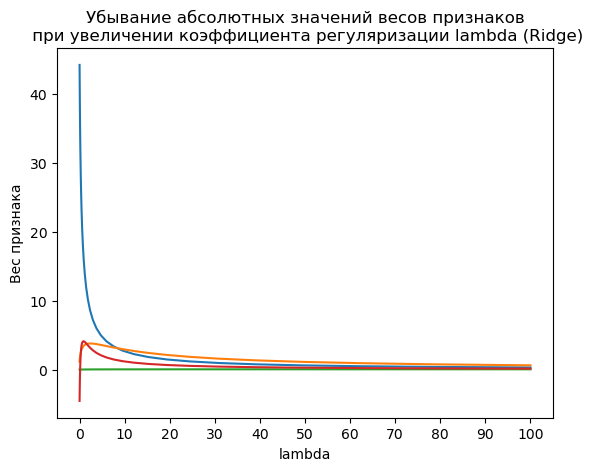

In [60]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]

mse_train = []
mse_test = []


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()
    
    coef = coeffs[i]
    y_pred_tr = np.dot(train_X, coef)
    mse_train.append(np.mean((y_pred_tr - train_y)**2))
    y_pred_ts = np.dot(test_X, coef)
    mse_test.append(np.mean((y_pred_ts - test_y)**2))


for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации lambda (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('lambda')
plt.ylabel('Вес признака');

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
4. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
5. [Переобучение и Недообучение. Видео](https://youtu.be/m7P7bnLxIc4)
6. [Методы масштабирования данных. Видео](https://youtu.be/XsuCOfpf8Ic)

## Summary

_Масштабирование_
* Масштабирование признаков - хорошая практика, позволяющая обучать модели быстрее и делающая их более точными
* При использовании метрических алгоритмов масштабирование обязательно (!)

_Стохастический градиентный спуск_
* Стохастический градиентный спуск (SGD) - на каждом шаге уменьшаем ошибку только на одном объекте (или нескольких), а не на всей выборке, работает быстрее обычного GD, т.к. меньше вычислений
* SGD из-за стохастичности может "перепрыгнуть" локальный минимум и попасть в глобальный

_Регуляризация_
* Переобучение - модель "выучила" выборку, но обобщающая способность слабая
* Признаки переобучения: качество на трейне высокое, а на тесте низкое, большие веса модели
* Один из способов борьбы с переобучением - регуляризация - штраф за большие веса

### Определения
*Масштабирование данных*

**Нормализация данных** — метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. (шкала от 0 до 1)

**Стандартизация** — метод предобработки с целью приведения данных к единому формату и представлению. (М=0, std=1)
___________
_Стохастический градиентный спуск_

**Стохастический градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента, который считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

___________
_Переобучение_

**Переобучение** (overfitting) — явление, когда алгоритм хорошо объясняет примеры из обучающей выборки (обеспечивает малую величину ошибки), но плохо работает на примерах, не участвовавших в обучении (не обеспечивает малую величину ошибки).

**Недообучение** (underfitting) — явление, при котором алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке.

**Кросс-валидация** — процедура оценивания обобщающей способности алгоритмов. С её помощью эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.

________
_Регуляризация_

**Регуляризация** — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели.
$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

**L1-регуляризация** (lasso, регуляризация через манхэттенское расстояние) — метод добавления дополнительных ограничений в виде $L_{1}$-норму вектора весов, то есть сумму модулей весов. 
$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

**L2-регуляризация** (ridge, регуляризация Тихонова) — метод добавления дополнительных ограничений в виде $L_{2}$-норму вектора весов, то есть сумму квадратов весов. 
$$||w||_{2} = \sum^{d}_{j=1}w^{2}.$$

